<b>Data wrangling</b> is the process of cleaning and unifying messy and complex data sets for easy access and analysis
<p>Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making.
Data has become more diverse and unstructured, demanding increased time spent culling, cleaning, and organizing data ahead of broader analysis. 
</p>

<b> Identify static columns or columns with little variance </b>

Columns with same value for all observations are not useful for modelling purpose, 
such static column(s) or predictor with single value, is called as zero-variance predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen

In [2]:
url = "https://raw.githubusercontent.com/shekhar270779/Learn_Data_Wrangling/master/data/oil-spill.csv"

data = np.loadtxt(urlopen(url), delimiter=",")

In [6]:
type(data)

numpy.ndarray

In [45]:
data.shape

(937, 50)

In [46]:
# Create a dataframe from 2 dim array
df = pd.DataFrame(data)

In [47]:
df.shape

(937, 50)

In [48]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,2558.0,1506.09,456.63,90.0,6395000.0,40.88,7.89,29780.0,0.19,...,2850.0,1000.0,763.16,135.46,3.73,0.0,33243.19,65.74,7.95,1.0
1,2.0,22325.0,79.11,841.03,180.0,55812500.0,51.11,1.21,61900.0,0.02,...,5750.0,11500.0,9593.48,1648.80,0.60,0.0,51572.04,65.73,6.26,0.0
2,3.0,115.0,1449.85,608.43,88.0,287500.0,40.42,7.34,3340.0,0.18,...,1400.0,250.0,150.00,45.13,9.33,1.0,31692.84,65.81,7.84,1.0


In [49]:
# no. of unique values in each column 
unique_counts = df.nunique()

In [50]:
unique_counts.head()

0    238
1    297
2    927
3    933
4    179
dtype: int64

In [51]:
# Select those column index which have only 1 unique value
unique_counts[unique_counts == 1]

22    1
dtype: int64

In [ ]:
# Select column index of columns which have very few unique values i.e.
# these are near zero variance predictors

In [52]:
unique_per = (df.nunique()/ len(df)) * 100

unique_per.head()

0    25.400213
1    31.696905
2    98.932764
3    99.573106
4    19.103522
dtype: float64

In [53]:
# column index which have less than 1 percent unique values
col_index = unique_per[unique_per < 1].index
col_index

Int64Index([21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49], dtype='int64')

In [54]:
df.drop(col_index, axis=1, inplace=True)

In [55]:
df.shape

(937, 39)

<b> Data deduplication: Remove duplicate rows </b>

In [58]:
iris_url = "https://raw.githubusercontent.com/shekhar270779/Learn_Data_Wrangling/master/data/iris.csv"

iris = pd.read_csv(iris_url)

iris.shape

(150, 5)

In [61]:
# display duplicate records
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [62]:
# Drop duplicates except for the first occurrence.
iris.drop_duplicates(keep='first', inplace=True)

In [64]:
# cross verify if stll any dup
iris.duplicated().any()

False

<b>Outlier detection</b>

An outlier is an observation that appears to deviate markedly from other members of the sample.
Statistics such as mean, variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers and their performance might be impaired by them**. Thus, it is common practice to engineer the features to minimise the impact of outliers on the performance of these algorithms.

<b> Nature of outliers </b>

- Genuine extremely high or extremely low values
- Introduced due to mechanical error (wrong measurement)
- Introduced by replacing missing values (NA) by a value out of the distribution

In some cases, the presence of outliers is informative, and therefore they deserve further study. 

## How can we pre-process outliers?

- Mean/median imputation or random sampling
- Discretization 
- Discard the outliers: process also called Trimming
- Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers


### Mean/median imputation or random sampling

If we have reasons to believe that the outliers are due to mechanical error or problems during measurement. This means, if the outliers are in nature similar to missing data, then any of the methods discussed for missing data can be applied to replace outliers. Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### Discretization 

Discretization  is the transformation of continuous variables into discrete variables. It involves assigning the variable values into defined groups. For example, for the variable age, we could group the observations (people) into buckets / groups like: 0-20, 21-40, 41-60, > 61. This grouping of the variables in ranges is called discretisation. As you can see, any outlier (extremely high) value of age would be included in the > 61 group, therefore minimising its impact. 

### Trimming

Trimming refers to the removal of the extreme values of a sample. In this procedure, the outliers are identified and those observations removed from the sample. On the down side, these values, may contain useful information for other variables included in the dataset. Thus, likely, we may choose not to remove these observations and handle outliers by top / bottom coding as described below.


## Top-coding, bottom-coding and zero-coding.

**Top-conding**, widely used in econometrics and statistics, means capping the maximum of a distribution at an arbitrarily set value. A top-coded variable is one for which data points whose values are above an upper bound are censored. This means in practical terms that all values above the upper band will be arbitrarily set to the upper band.

Top-coding is common practice in survey data, before it is released to the public. It is used to preserve the anonymity of respondents. For example, high earners may be easily identifiable by their earnings. Thus, by implementing top-coding, that outlier is capped at a certain maximum value and therefore looks like many other observations, it is not uniquely identifiable any more. Top-coding can be also applied to prevent possibly-erroneous outliers from being published.

Bottom-coding is analogous, but on the left side of the distribution. This is, all values below a certain threshold, are capped at that threshold. If the threshold is zero, then it is known as **zero-coding**, e.g. if amounts below zero are reported as zero. Good examples would be the variable "age", or the variable "earnings". It is not possible to have negative age or a negative salary, thus, it is reasonable to cap the lowest values at zero. Any observation with a value under zero must have been introduced by mistake.



#### Note

Top-coding may affect estimates of the standard errors of the variable, or change the variable distribution, by censoring those values at the far end of the tails.


### Identifying outliers

#### Extreme Value Analysis

The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

In [85]:
# Read titanic dataset

titanic_url = "https://raw.githubusercontent.com/shekhar270779/Learn_Data_Wrangling/master/data/titanic_feature.csv"

titanic = pd.read_csv(titanic_url)

titanic.shape

(891, 12)

In [86]:
from sklearn.model_selection import train_test_split

In [91]:
# divide data into train and test 
X_train, X_test, y_train, y_test = train_test_split(titanic, titanic.Survived, 
                                                    test_size=0.3, random_state=0)

In [92]:
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [93]:
y_train.shape, y_test.shape

((623,), (268,))

In [94]:
X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S


In [95]:
X_train = X_train.drop(['Survived'], axis=1).copy()
X_test = X_test.drop(['Survived'], axis=1).copy()

**Top-coding** and **bottom-coding**, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap the values in the test set.

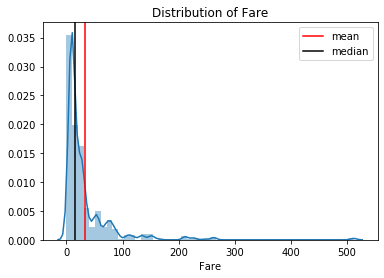

In [106]:
fig, ax = plt.subplots()

ax = sns.distplot(X_train['Fare'])
ax.set_title('Distribution of Fare')
ax.axvline(np.mean(X_train['Fare']), color='red', label='mean')
ax.axvline(np.median(X_train['Fare']), color='black', label='median')

ax.legend()
plt.show()

Because the distribution of Fare is skewed, we should estimate outliers using the quantile method instead of the Gaussian distribution.

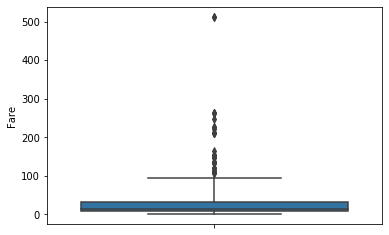

In [124]:
fig, ax = plt.subplots()

ax = sns.boxplot(X_train['Fare'], orient='v', whis=3.0)

plt.show()

In [125]:
X_train['Fare'].describe()

count    623.000000
mean      32.458273
std       48.257658
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: Fare, dtype: float64

In [127]:
# Top Coding

IQR = np.quantile(titanic['Fare'], q = 0.75) - np.quantile(titanic['Fare'], q = 0.25)
upper_fence = np.quantile(X_train['Fare'], q = 0.75)  + (IQR * 3)
upper_fence

100.6563

In [134]:
# top coding , capping feature Fare at 100.6563
X_train.loc[X_train['Fare'] > upper_fence, 'Fare'] = upper_fence
X_test.loc[X_test['Fare'] > upper_fence, 'Fare'] = upper_fence

In [141]:
titanic.loc[titanic['Fare'] == 0, ['Pclass', 'Age', 'Fare']]

,Pclass,Age,Fare
179,3,36.0,0.0
263,1,40.0,0.0
271,3,25.0,0.0
277,2,NaN,0.0
302,3,19.0,0.0
413,2,NaN,0.0
466,2,NaN,0.0
481,2,NaN,0.0
597,3,49.0,0.0
633,1,NaN,0.0


In [153]:
X_train[X_train['Fare']>0].groupby(['Pclass'])['Fare'].min()

Pclass
1     5.0000
2    10.5000
3     6.2375
Name: Fare, dtype: float64

In [154]:
X_train.loc[(X_train['Pclass']==1) & (X_train['Fare']==0), 'Fare'] = 5

In [155]:
X_train.loc[(X_train['Pclass']==2) & (X_train['Fare']==0), 'Fare'] = 10.5

In [156]:
X_train.loc[(X_train['Pclass']==3) & (X_train['Fare']==0), 'Fare'] = 6.23